<a href="https://colab.research.google.com/github/RiniPaul86/Assignment/blob/main/Obesity_Classification_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing impt liberaries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the datasets
ob = pd.read_csv("/content/Obesity Classification.csv")

In [3]:
ob.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [4]:
ob.ndim

2

In [5]:
ob.shape

(108, 7)

In [6]:
ob.size

756

In [7]:
ob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [8]:
ob.isnull().sum()

,0
ID,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
Label,0


In [9]:
ob.duplicated().sum()

0

In [10]:
#The ID column is not relevant for training the model, so we'll drop it.
ob = ob.drop(columns=['ID'])

In [11]:
# Encoding Gender and Label columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
ob['Gender'] = label_encoder.fit_transform(ob['Gender'])  # Encode Gender
ob['Label'] = label_encoder.fit_transform(ob['Label'])    # Encode Label (Target variable)

In [12]:
#Split the data into training and testing sets.

X = ob.drop(columns=['Label'])  # Features: Age, Gender, Height, Weight, BMI
y = ob['Label']  # Target: Label (Obesity classification)

# Split the data into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [14]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [15]:
#We'll use metrics like accuracy, precision, recall, and the confusion matrix to evaluate the model.

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        13

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

Confusion Matrix:
[[ 6  0  0  0]
 [ 0  5  0  0]
 [ 0  0  9  0]
 [ 0  0  0 13]]


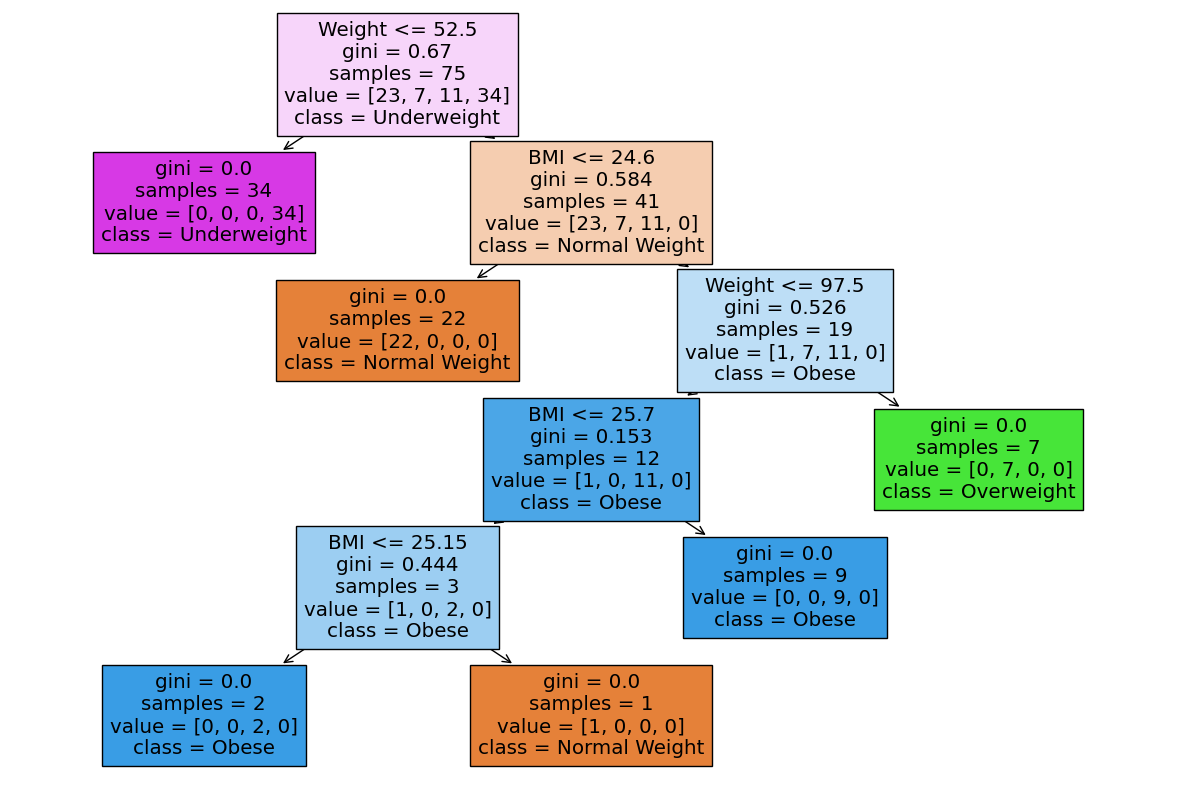

In [16]:
#To better understand the decision-making process of the model, you can visualize the decision tree.

# Plotting the Decision Tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Normal Weight', 'Overweight', 'Obese', 'Underweight'], filled=True)
plt.show()

In [17]:
#To optimize the model, you can perform hyperparameter tuning using GridSearchCV.

from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {'max_depth': [3, 5, 7, 10],
              'min_samples_split': [2, 5, 10],
              'criterion': ['gini', 'entropy']}

# Perform GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters from the grid search
print(f'Best Parameters: {grid_search.best_params_}')

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


In [18]:
# Re-train the model using the best parameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [19]:
# Predictions with the optimized model
y_pred_optimized = best_clf.predict(X_test)

In [20]:
# Evaluate the optimized model
print(f'Optimized Accuracy: {accuracy_score(y_test, y_pred_optimized)}')

Optimized Accuracy: 0.9393939393939394


In [21]:
#Before Optimization:

#The model achieved 100% accuracy, with perfect precision, recall, and F1-scores for all classes.
#The confusion matrix showed no misclassifications.
#However, such high accuracy suggests overfitting, where the model likely memorized the training data rather than generalizing well.

#After Optimization:

#After applying GridSearchCV, the models accuracy dropped slightly to 93.94%.
#The optimized model is less complex, with a max depth of 3, improving its generalizability.
#The slight drop in accuracy indicates the model now avoids overfitting and can better handle unseen data, making it more robust.
#This shows a trade-off between complexity and accuracy, with better overall performance after tuning.

In [22]:
# Get the optimized model
optimized_model = grid_search.best_estimator_

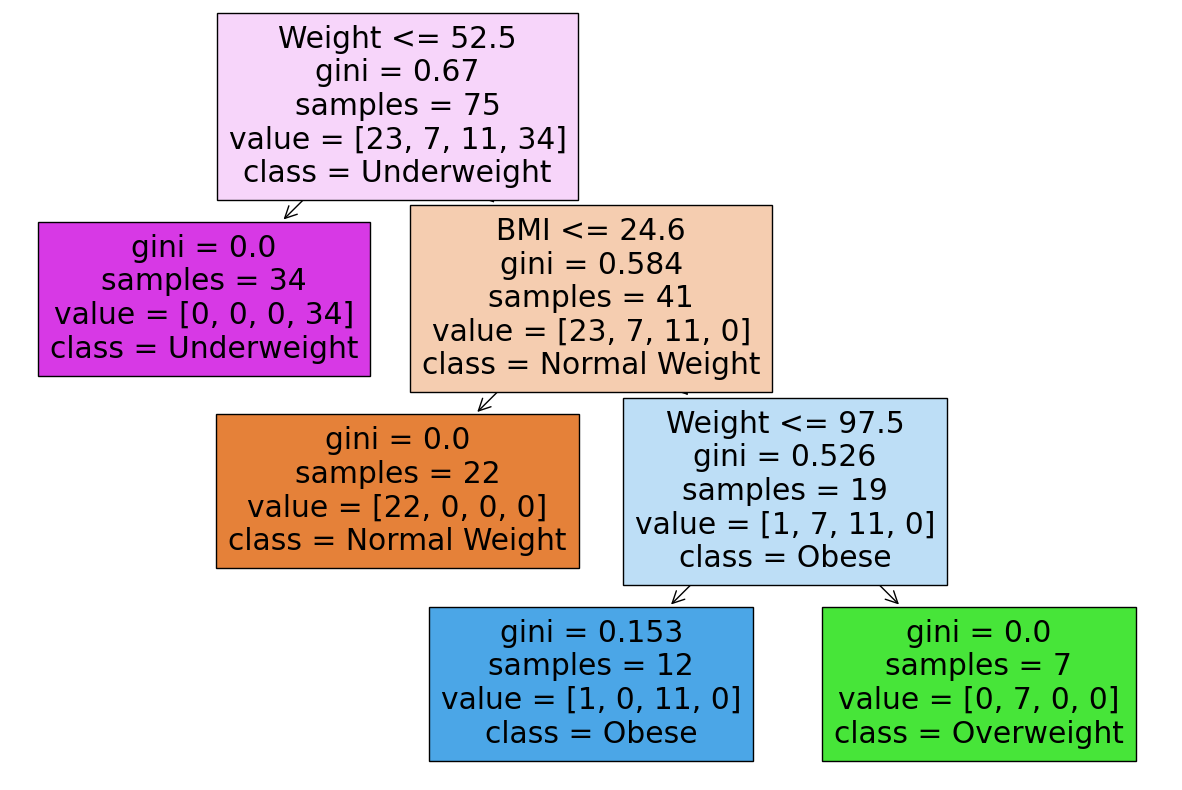

In [23]:
# Plotting the Decision Tree
plt.figure(figsize=(15, 10))
tree.plot_tree(best_clf, feature_names=X.columns, class_names=['Normal Weight', 'Overweight', 'Obese', 'Underweight'], filled=True)
plt.show()

In [24]:
#Testing the optimized model with a new datapoint

# new data point (Age, Gender, Height, Weight, BMI)

new_data = pd.DataFrame({
    'Age': [25],
    'Gender': [0],  # Assuming '0' is encoded for Male and '1' for Female
    'Height': [170],  # Height in cm
    'Weight': [70],   # Weight in kg
    'BMI': [24.22]    # Calculate BMI based on the formula
})

# Scale the new data using the same scaler used during training
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(new_data)

# Make the prediction
prediction = optimized_model.predict(new_data_scaled)


In [25]:
# Define the mapping of numeric values to obesity class labels
label_mapping = {
    0: "Underweight",
    1: "Normal Weight",
    2: "Overweight",
    3: "Obese"
}

In [26]:
# Get the numeric prediction from the model
prediction = optimized_model.predict(new_data_scaled)

# Map the numeric prediction to the corresponding label
predicted_label = label_mapping[prediction[0]]

# Output the result
print("Predicted Obesity Classification:", predicted_label)

Predicted Obesity Classification: Obese


In [27]:
#The decision tree model predicts the obesity classification based on the input features.